<div align="center" style="color:Blue;font-size:18px">Predicting Interest Level of Property</div>

### Task1 : Data Loading

In [84]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import accuracy_score,precision_score,f1_score,recall_score,confusion_matrix
import warnings
warnings.filterwarnings('ignore')
import reverse_geocoder as rg
from sklearn.model_selection import RepeatedStratifiedKFold,cross_val_score

In [2]:
df=pd.read_csv("DS2_C5_S7_AllRent_Data_Challenge.csv")
df.head()

,Unnamed: 0,bathrooms,bedrooms,building_id,created,description,display_address,features,latitude,listing_id,longitude,manager_id,photos,price,street_address,interest_level
0,105408,1.0,0,0f9d07991ba14c82d3d368b72d90270a,04-04-2016 03:34,Gorgeous unit in one of the most genuinely cov...,230 Central Park South,"['Cats Allowed', 'Dogs Allowed', 'Doorman', 'E...",40.7672,6827153,-73.9802,932589de9230b697808216774fa26bd4,['https://photos.renthop.com/2/6821519_0a14cc2...,2800,230 Central Park South,high
1,110219,1.0,1,564d6f608f41e8d4a5e181c4e068e3d9,21-04-2016 20:40,Enormous 1 bedroom apartment in Murray Hill. F...,E 39th St,"['Cats Allowed', 'Dogs Allowed', 'Reduced Fee'...",40.7483,6908998,-73.9741,489ad933197469ae66acd1f7ce18f908,['https://photos.renthop.com/2/6908998_6b00895...,2100,243 E 39th St,high
2,56113,1.0,1,69790fbf0bf7e22b1d0ebc721cf0f633,14-05-2016 05:44,"This 1 bedroom, 1 bathroom spacious apartment ...",E 25th St.,"['Elevator', 'Furnished', 'Hardwood Floors']",40.7399,7013774,-73.9812,792c0f1ad1431397c65db3e69b770928,['https://photos.renthop.com/2/7013774_e7ead5d...,3000,217 E 25th St.,high
3,37765,1.0,2,d0234abbc01a982d54e8d446acc03405,05-06-2016 03:37,SPECTACULAR2 BEDROOM APARTMENT IN LUXURY 24HR ...,West 34th Street,"['Doorman', 'Elevator', 'Dishwasher', 'Hardwoo...",40.7530,7113518,-73.9958,eb5a6c4c2eb6f3e2a085c477afd5a815,['https://photos.renthop.com/2/7113518_d234153...,3000,360 West 34th Street,high
4,67397,1.0,2,a36895b9975c6991ca0fa1d9a99023a1,26-05-2016 05:36,NO FEE.. Newly Reno XL Convertible 2 Br .. Pri...,East 72nd Street,"['Dining Room', 'Doorman', 'Elevator', 'Fitnes...",40.7695,7071666,-73.9603,0a6ba20b892ed61df751420934d1ab51,['https://photos.renthop.com/2/7071666_4f81618...,3300,200 East 72nd Street,high


### Task2 : Data Exploration

In [5]:
df.shape

(9871, 16)

In [4]:
df.columns

Index(['Unnamed: 0', 'bathrooms', 'bedrooms', 'building_id', 'created',
       'description', 'display_address', 'features', 'latitude', 'listing_id',
       'longitude', 'manager_id', 'photos', 'price', 'street_address',
       'interest_level'],
      dtype='object')

In [6]:
df.describe()

,Unnamed: 0,bathrooms,bedrooms,latitude,listing_id,longitude,price
count,9871.000000,9871.000000,9871.000000,9871.000000,9.871000e+03,9871.000000,9871.000000
mean,61828.973154,1.210617,1.533685,40.747167,7.024062e+06,-73.965549,3662.860804
std,35901.607107,0.501985,1.106696,0.414548,1.269108e+05,0.760686,2559.911997
min,9.000000,0.000000,0.000000,0.000000,6.812005e+06,-87.613400,43.000000
25%,30968.000000,1.000000,1.000000,40.727500,6.914494e+06,-73.992200,2499.000000
50%,61354.000000,1.000000,1.000000,40.750600,7.022816e+06,-73.978300,3125.000000
75%,93229.500000,1.000000,2.000000,40.773900,7.130978e+06,-73.955100,4047.500000
max,123995.000000,10.000000,8.000000,43.034600,7.742631e+06,0.000000,90000.000000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9871 entries, 0 to 9870
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       9871 non-null   int64  
 1   bathrooms        9871 non-null   float64
 2   bedrooms         9871 non-null   int64  
 3   building_id      9871 non-null   object 
 4   created          9871 non-null   object 
 5   description      9585 non-null   object 
 6   display_address  9837 non-null   object 
 7   features         9871 non-null   object 
 8   latitude         9871 non-null   float64
 9   listing_id       9871 non-null   int64  
 10  longitude        9871 non-null   float64
 11  manager_id       9871 non-null   object 
 12  photos           9871 non-null   object 
 13  price            9871 non-null   int64  
 14  street_address   9866 non-null   object 
 15  interest_level   9871 non-null   object 
dtypes: float64(3), int64(4), object(9)
memory usage: 1.2+ MB


### Task3: Data Preprocessing

In [8]:
df.drop(["Unnamed: 0","building_id","display_address","listing_id","manager_id","photos","street_address","description","features"],axis=1,inplace=True)

In [9]:
df.head()

,bathrooms,bedrooms,created,latitude,longitude,price,interest_level
0,1.0,0,04-04-2016 03:34,40.7672,-73.9802,2800,high
1,1.0,1,21-04-2016 20:40,40.7483,-73.9741,2100,high
2,1.0,1,14-05-2016 05:44,40.7399,-73.9812,3000,high
3,1.0,2,05-06-2016 03:37,40.7530,-73.9958,3000,high
4,1.0,2,26-05-2016 05:36,40.7695,-73.9603,3300,high


In [10]:
#reverse geoencoding using reverse geocoder
#and dropping lat&long after getting location
l=list(zip(df["latitude"],df["longitude"]))
f=rg.search(l)
df["location"]=[i["name"] for i in f]
df.drop(["latitude","longitude"],axis=1,inplace=True)

Loading formatted geocoded file...


In [11]:
#converting created column to datetime.
#then subtracting it from current date to get apartment's age
df["created"]=pd.to_datetime(df["created"])
current=pd.to_datetime('today').normalize()
df["days_created"]=current-df["created"]
df.drop("created",axis=1,inplace=True)
df["days_created"]=df["days_created"].apply(lambda x:str(x).split(" ")[0])
df.head()

,bathrooms,bedrooms,price,interest_level,location,days_created
0,1.0,0,2800,high,Manhattan,2428
1,1.0,1,2100,high,Long Island City,2411
2,1.0,1,3000,high,Long Island City,2388
3,1.0,2,3000,high,Weehawken,2396
4,1.0,2,3300,high,Manhattan,2376


In [12]:
df.isnull().sum()

bathrooms         0
bedrooms          0
price             0
interest_level    0
location          0
days_created      0
dtype: int64

### Task4 : Data Visuzliazation

<AxesSubplot:xlabel='interest_level', ylabel='count'>

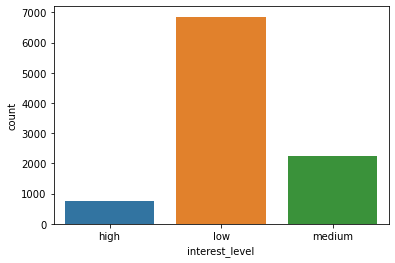

In [13]:
sns.countplot(data=df,x='interest_level')

In [14]:
#low interest level category has highest count

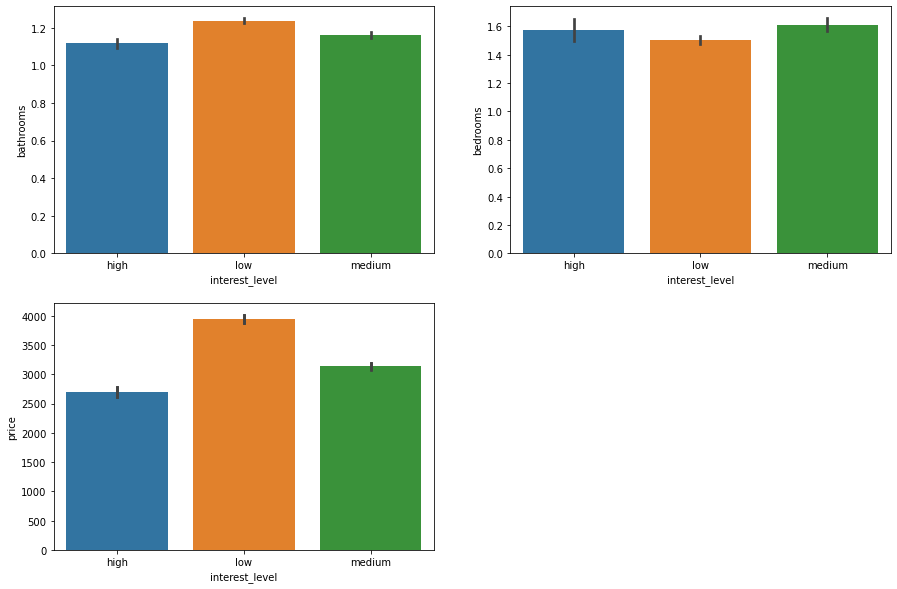

In [15]:
plt.figure(figsize=(15,10))
plt.subplot(221)
sns.barplot(data=df,x="interest_level",y='bathrooms')
plt.subplot(222)
sns.barplot(data=df,x="interest_level",y='bedrooms')
plt.subplot(223)
sns.barplot(data=df,x="interest_level",y='price')
plt.subplot(223)
sns.barplot(data=df,x="interest_level",y='price')
plt.show()

Visualizing target-interest level with number bathrooms/bedrooms and price
in low interest level category, mean number of bathrooms is higher
is medium interest level category, mean number of bedrooms is higher
mean price of low interest category is higher

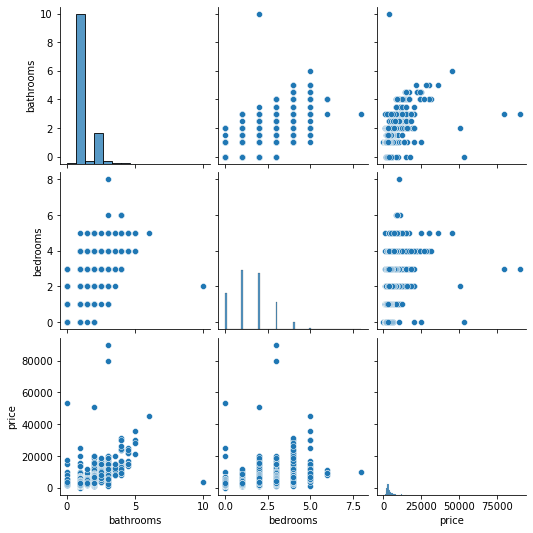

In [16]:
sns.pairplot(df)

In [17]:
#inter feature relationship:
#bathrooms,bedrooms and price are correlated with each other

### Feature Engineering

In [18]:
df.dtypes

bathrooms         float64
bedrooms            int64
price               int64
interest_level     object
location           object
days_created       object
dtype: object

In [19]:
#converting object to category for label encoding
c=df.select_dtypes(include="object")
for i in c:
    df[i]=df[i].astype("category")
df.dtypes

bathrooms          float64
bedrooms             int64
price                int64
interest_level    category
location          category
days_created      category
dtype: object

In [20]:
#Label encoding
for i in c:
    df[i]=LabelEncoder().fit_transform(df[i])
df.head()

,bathrooms,bedrooms,price,interest_level,location,days_created
0,1.0,0,2800,0,22,80
1,1.0,1,2100,0,21,69
2,1.0,1,3000,0,21,55
3,1.0,2,3000,0,36,57
4,1.0,2,3300,0,22,43


<AxesSubplot:>

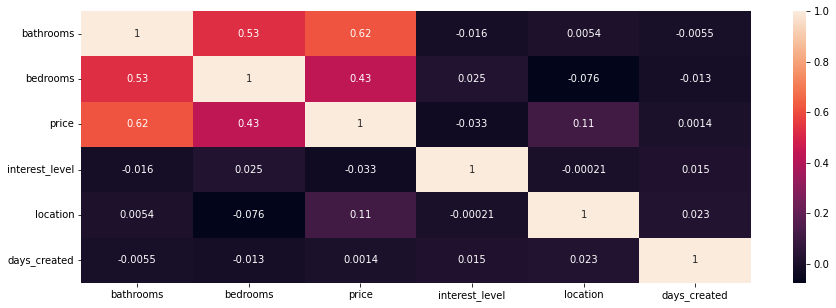

In [21]:
#Correlation matrix
plt.figure(figsize=(15,5))
sns.heatmap(df.corr(),annot=True)

In [22]:
#Interest level is our target variable
#all are less correlated with target.so considering all for modelling

In [25]:
#standard scaling
df1=df.loc[:,df.columns!="interest_level"]
scaler=StandardScaler()
y=df["interest_level"]
df=pd.DataFrame(scaler.fit_transform(df1),columns=df1.columns)
df["interest_level"]=y

In [44]:
#separating x and y
#train test split
x=df.iloc[:,:-1]
y=df["interest_level"]
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)

### Task 5 : Model Building

In [45]:
cv=RepeatedStratifiedKFold(n_splits=10,n_repeats=3,random_state=1)

#### Baseline model: Decision Tree Classifier

In [58]:
from sklearn.tree import DecisionTreeClassifier

In [59]:
model1=DecisionTreeClassifier()

In [60]:
score1=cross_val_score(model1,x,y,cv=cv,n_jobs=-1,scoring="accuracy")

In [61]:
score1.mean()

0.5999378902794356

#### Bagging : Random Forest

In [50]:
from sklearn.ensemble import RandomForestClassifier

In [51]:
model2=RandomForestClassifier()

In [52]:
score2=cross_val_score(model2,x,y,cv=cv,n_jobs=-1,scoring="accuracy")

In [53]:
score2.mean()

0.6562989237961242

#### Boosting : Adaptive Boosting

In [54]:
from sklearn.ensemble import AdaBoostClassifier

In [55]:
model3=AdaBoostClassifier()

In [56]:
score3=cross_val_score(model3,x,y,cv=cv,n_jobs=-1,scoring="accuracy")

In [57]:
score3.mean()

0.7000644341349829

#### Stacking

In [62]:
# Base Models: KNN,SVC,Naive Bayes
#Meta model:Logistic regressor

In [64]:
from sklearn.ensemble import StackingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression

In [65]:
level0=[("knn",KNeighborsClassifier()),("svc",SVC()),("bayes",GaussianNB())]
level1=LogisticRegression()

In [67]:
model4=StackingClassifier(estimators=level0,final_estimator=level1,n_jobs=-1,cv=5)

In [68]:
score4=cross_val_score(model4,x,y,cv=cv,n_jobs=-1,scoring="accuracy")

In [69]:
score4.mean()

0.6941208722843661

### Task6 : Comparing all models 

In [ ]:
#distribution of accuracy for different folds of each models

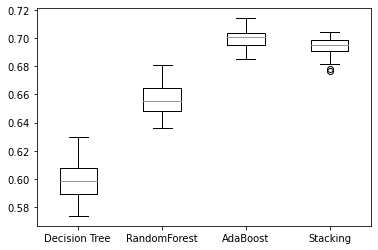

In [71]:
plt.boxplot([score1,score2,score3,score4],labels=["Decision Tree ","RandomForest","AdaBoost","Stacking"])
plt.show()

In [72]:
#Out of all models AdaBoost Classifier has given best accuracy.
#So using that to fit training data

In [73]:
model=AdaBoostClassifier().fit(x_train,y_train)

In [74]:
#training accuracy
model.score(x_train,y_train)

0.7080619481835287

In [75]:
#test accuracy
model.score(x_test,y_test)

0.6927751519243754

In [76]:
y_pred=model.predict(x_test)

In [ ]:
#y actual vs predicted for our chosen model adaboosting 

In [77]:
dfy=pd.DataFrame({"actual":y_test,"predicted":y_pred})
dfy.head()

,actual,predicted
9203,2,1
4291,1,1
4269,1,1
3381,1,1
7873,2,1


In [78]:
#accuracy score
accuracy_score(y_test,y_pred)

0.6927751519243754

In [81]:
#precision score
precision_score(y_test,y_pred,average="weighted")

0.6092244670028377

In [82]:
#recall score
recall_score(y_test,y_pred,average="weighted")

0.6927751519243754

In [83]:
#f1 score
f1_score(y_test,y_pred,average="weighted")

0.5970567517549316

In [85]:
#confusion matrix
confusion_matrix(y_test,y_pred)

array([[  35,  200,   25],
       [  11, 1991,   27],
       [  15,  632,   26]], dtype=int64)

In [ ]:
#After evaluating models using CV and using best performed adaboosting on our dataset to build model,
#we got accuracy of around 70% .so model is not so great model